Dataset Shape: (150, 5)
Columns: ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'target']

Preview:
   SepalLength  SepalWidth  PetalLength  PetalWidth  target
0          5.1         3.5          1.4         0.2       0
1          4.9         3.0          1.4         0.2       0
2          4.7         3.2          1.3         0.2       0
3          4.6         3.1          1.5         0.2       0
4          5.0         3.6          1.4         0.2       0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   target       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Statistical Summary:
       SepalLength  SepalWidth  PetalL

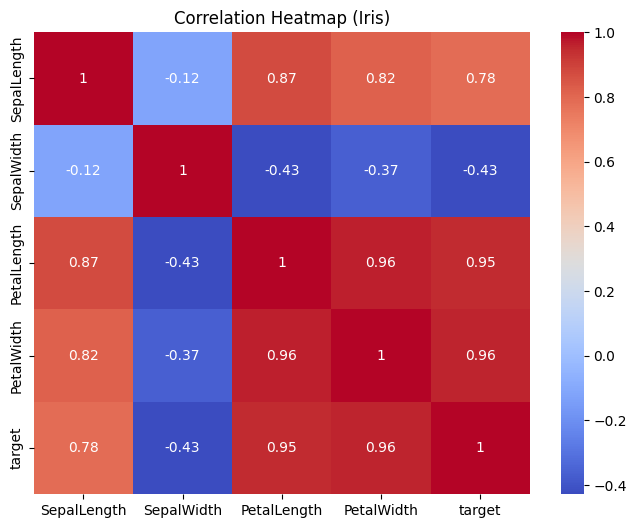


ANOVA Result (SepalLength by Species):
F_onewayResult(statistic=np.float64(119.26450218450468), pvalue=np.float64(1.669669190769383e-31))

Regression Summary (SepalLength ~ PetalLength + PetalWidth):
                            OLS Regression Results                            
Dep. Variable:            SepalLength   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     241.0
Date:                Sat, 13 Sep 2025   Prob (F-statistic):           4.00e-47
Time:                        12:19:20   Log-Likelihood:                -75.023
No. Observations:                 150   AIC:                             156.0
Df Residuals:                     147   BIC:                             165.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
         

C:\Users\kruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kruti\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\kruti\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kruti\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

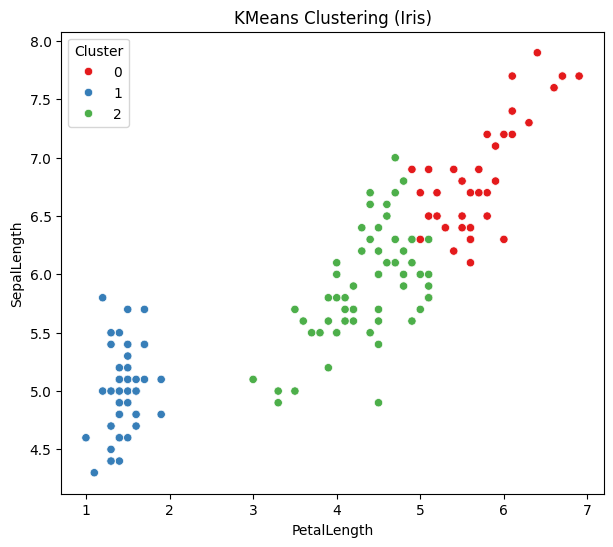

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# ==============================
# STEP 1: Load Dataset
# ==============================
iris = load_iris(as_frame=True)
df = iris.frame
df.rename(columns={
    "sepal length (cm)": "SepalLength",
    "sepal width (cm)": "SepalWidth",
    "petal length (cm)": "PetalLength",
    "petal width (cm)": "PetalWidth"
}, inplace=True)

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nPreview:")
print(df.head())

# ==============================
# STEP 2: Basic Summary
# ==============================
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe(include='all'))

# ==============================
# STEP 3: Missing Values
# ==============================
print("\nMissing Values:")
print(df.isnull().sum())

# ==============================
# STEP 4: Correlation Analysis
# ==============================
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap (Iris)")
    plt.show()

# ==============================
# STEP 5: ANOVA Example (SepalLength by Species)
# ==============================
if 'target' in df.columns:  # 'target' column is species index
    groups = [df['SepalLength'][df['target'] == g] for g in df['target'].unique()]
    anova_res = stats.f_oneway(*groups)
    print("\nANOVA Result (SepalLength by Species):")
    print(anova_res)

# ==============================
# STEP 6: Regression Example
# Predict SepalLength from PetalLength + PetalWidth
# ==============================
if {'SepalLength','PetalLength','PetalWidth'}.issubset(df.columns):
    model = smf.ols('SepalLength ~ PetalLength + PetalWidth', data=df).fit()
    print("\nRegression Summary (SepalLength ~ PetalLength + PetalWidth):")
    print(model.summary())

# ==============================
# STEP 7: Clustering Example
# KMeans on SepalLength, PetalLength, PetalWidth
# ==============================
if {'SepalLength','PetalLength','PetalWidth'}.issubset(df.columns):
    X = df[['SepalLength','PetalLength','PetalWidth']]
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['Cluster'] = kmeans.fit_predict(X)

    plt.figure(figsize=(7,6))
    sns.scatterplot(data=df, x='PetalLength', y='SepalLength', hue='Cluster', palette='Set1')
    plt.title("KMeans Clustering (Iris)")
    plt.show()
